In [6]:
import os
import matplotlib
# Installing necessary dependencies Qiskit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler

from src.analyzer import DataAnalysis
from src.constant import QubitParameters
from src.utility import fit_function
from qiskit_ibm_provider import IBMProvider
# from src.pulse import Pulse01, Pulse12
# from src.calibration.transmission_reflection import TR01, TR12
# from src.calibration.rough_rabi import RoughRabi01, RoughRabi12
# from src.calibration.discriminator import DiscriminatorQutrit
# from src.backend.backend_ibm import EffProvider

from scipy.optimize import curve_fit

# eff_provider = EffProvider(
#     token='b751d05f9c3522f9d46a851e2830dfa0d6087643fcdda1588b781e2f349cbaa8c6d7b1dbec1ec3262857523289bb385ee8ad7b86a83c045ca69aba6b1bc4b3d8')

provider = IBMProvider(token="b751d05f9c3522f9d46a851e2830dfa0d6087643fcdda1588b781e2f349cbaa8c6d7b1dbec1ec3262857523289bb385ee8ad7b86a83c045ca69aba6b1bc4b3d8")
warnings.filterwarnings('ignore')
os.getcwd()

'C:\\Users\\reach\\Coding\\qutritium'

In [14]:
pulse01 = Pulse01(duration=144, x_amp=0.2)
pulse12 = Pulse12(pulse01=pulse01, duration=pulse01.duration, x_amp=pulse01.x_amp)

# TR01
# tr_01 = TR01(pulse_model=pulse01,)
# tr_01.modify_pulse_model('ci44lelejm3lf1cnm1dg')

# RR01
# rr_01 = RoughRabi01(pulse_model=pulse01,)
# rr_01.modify_pulse_model('ci68glokbvp2ovrji920')

# TR12
# tr_12 = TR12(pulse_model=pulse12)
# tr_12.modify_pulse_model('ci6j057hmv10icuudbrg')

# RR12
# rr_12 = RoughRabi12(pulse_model=pulse12)
# rr_12.modify_pulse_model('ci6kin68t9vighsij210')

tr_01_job = provider.backend.retrieve_job('ci44lelejm3lf1cnm1dg')
tr_01_data = DataAnalysis(tr_01_job)
tr_01_data.retrieve_data(average=True)
backend = provider.get_backend(name="ibm_brisbane")
backend_defaults = backend.defaults()
GHz = 1.0e9
MHz = 1.0e6
center_frequency_Hz = backend_defaults.qubit_freq_est[0]
frequency_span_Hz = 40 * MHz
frequency_step_Hz = 0.5 * MHz

frequency_min = center_frequency_Hz - frequency_span_Hz / 2
frequency_max = center_frequency_Hz + frequency_span_Hz / 2

frequencies_01_GHz = np.arange(frequency_min / GHz,
                            frequency_max / GHz,
                            frequency_step_Hz / GHz)

fit_params_sweep01, _ = fit_function(frequencies_01_GHz, tr_01_data.IQ_data,
                                 lambda x, A, q_freq, B, C: (A / np.pi) * (B / ((x - q_freq)**2 + B**2)) + C,
                                 [3, 5, 1, -2])

rough_frequency_01 = fit_params_sweep01[1]*GHz

rough_frequency_01

4721552470.58941

# Scaler

In [3]:
# Scaler TR01
scaler01 = MinMaxScaler(feature_range=(-4, 4))
y_tr01_reshaped = np.array(tr_01.analyzer.IQ_data).reshape(-1, 1)
y_tr01_normalized = scaler01.fit_transform(y_tr01_reshaped)
tr01_fit_reshaped = np.array(tr_01.tr_fit).reshape(-1, 1)
tr01_fit_normalized = scaler01.fit_transform(tr01_fit_reshaped)

# Scaler RR01
y_rr01_reshaped = np.array(rr_01.analyzer.IQ_data).reshape(-1, 1)
y_rr01_normalized = scaler01.fit_transform(y_rr01_reshaped)
rr01_fit_reshaped = np.array(rr_01.rr_fit).reshape(-1, 1)
rr01_fit_normalized = scaler01.fit_transform(rr01_fit_reshaped)

# Scaler TR12
scaler12 = MinMaxScaler(feature_range=(6.8, 8.2))
y_tr12_reshaped = np.array(tr_12.analyzer.IQ_data).reshape(-1, 1)
y_tr12_normalized = scaler12.fit_transform(y_tr12_reshaped)
tr12_fit_reshaped = np.array(tr_12.tr_fit).reshape(-1, 1)
tr12_fit_normalized = scaler12.fit_transform(tr12_fit_reshaped)

# Scaler RR12
y_rr12_reshaped = np.array(rr_12.analyzer.IQ_data).reshape(-1, 1)
y_rr12_normalized = scaler12.fit_transform(y_rr12_reshaped)
rr12_fit_reshaped = np.array(rr_12.rr_fit).reshape(-1, 1)
rr12_fit_normalized = scaler12.fit_transform(rr12_fit_reshaped)

# Plot

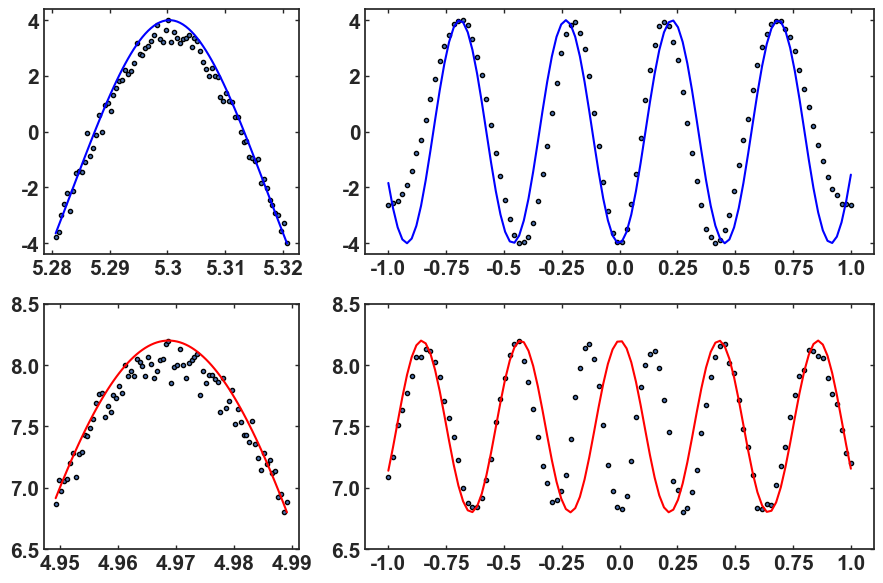

In [6]:
sns.set(style="white")
fig, axs = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 2]},
                        figsize=(9, 6))

# Plot scatters
# TR01
axs[0, 0].scatter(x=tr_01.freq_sweeping_range_ghz, y=y_tr01_normalized, marker='.',
                  edgecolors='black')
axs[0, 0].plot(tr_01.freq_sweeping_range_ghz, tr01_fit_normalized, color='blue')
axs[0, 0].set_xticks([5.28, 5.29, 5.30, 5.31, 5.32])
axs[0, 0].set_yticks([4, 2, 0, -2, -4])
axs[0, 0].set_xticklabels([5.28, 5.29, 5.30, 5.31, 5.32], fontweight='bold')
axs[0, 0].set_yticklabels([4, 2, 0, -2, -4], fontweight='bold')
axs[0, 0].tick_params(direction='in', top=True, right=True,
                      bottom=True, left=True, length=3, width=1,
                      labelsize=15)
# RR01
axs[0, 1].scatter(x=rr_01.x_amp_sweeping_range, y=y_rr01_normalized, marker='.',
                  edgecolors='black')
axs[0, 1].plot(rr_01.x_amp_sweeping_range, rr01_fit_normalized, color='blue')
axs[0, 1].set_yticks([4, 2, 0, -2, -4])
axs[0, 1].set_xticks([-1., -0.75, -0.25, -0.50, 0., 0.25, 0.50, 0.75, 1.])
axs[0, 1].set_xticklabels([-1., -0.75, -0.25, -0.50, 0., 0.25, 0.50, 0.75, 1.], fontweight='bold')
axs[0, 1].set_yticklabels([4, 2, 0, -2, -4], fontweight='bold')
axs[0, 1].tick_params(direction='in', top=True, right=True,
                      bottom=True, left=True, length=3, width=1,
                      labelsize=15)
# TR12
axs[1, 0].scatter(x=tr_12.freq_sweeping_range_ghz, y=y_tr12_normalized, marker='.',
                  edgecolors='black')
axs[1, 0].plot(tr_12.freq_sweeping_range_ghz, tr12_fit_normalized, color='red')
axs[1, 0].set_yticks([6.5, 7.0, 7.5, 8.0, 8.5])
axs[1, 0].set_xticks([4.95, 4.96, 4.97, 4.98, 4.99])
axs[1, 0].set_xticklabels([4.95, 4.96, 4.97, 4.98, 4.99], fontweight='bold')
axs[1, 0].set_yticklabels([6.5, 7.0, 7.5, 8.0, 8.5], fontweight='bold')
axs[1, 0].tick_params(direction='in', top=True, right=True,
                      bottom=True, left=True, length=3, width=1,
                      labelsize=15)
# RR12
axs[1, 1].scatter(x=rr_12.x_amp_sweeping_range, y=y_rr12_normalized, marker='.',
                  edgecolors='black')
axs[1, 1].plot(rr_12.x_amp_sweeping_range, rr12_fit_normalized, color='red')
axs[1, 1].set_yticks([6.5, 7.0, 7.5, 8.0, 8.5])
axs[1, 1].set_xticks([-1., -0.75, -0.25, -0.50, 0., 0.25, 0.50, 0.75, 1.])
axs[1, 1].set_xticklabels([-1., -0.75, -0.25, -0.50, 0., 0.25, 0.50, 0.75, 1.], fontweight='bold')
axs[1, 1].set_yticklabels([6.5, 7.0, 7.5, 8.0, 8.5], fontweight='bold')
axs[1, 1].tick_params(direction='in', top=True, right=True,
                      bottom=True, left=True, length=3, width=1,
                      labelsize=15)

fig.tight_layout()
plt.savefig('output/TR + RR IBM_Quito test.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()

In [ ]:
discriminator_job = eff_provider.retrieve_job('ci6rll5ejm3lf1fkksj0')
exp_results = discriminator_job.result(timeout=120)
iq_data = []
SCALE = 1.0e-14
for i in range(len(exp_results.results)):
    iq_data.append(exp_results.get_memory(i)[:, 0] * SCALE)
zero_data = iq_data[0]
one_data = iq_data[1]
two_data = iq_data[2]
sns.set(style="white")
# state 0 plotted in blue
plt.scatter(np.real(zero_data), np.imag(zero_data),
            s=5, c='blue', alpha=0.5)
# state 1 plotted in red
plt.scatter(np.real(one_data), np.imag(one_data),
            s=5, c='red', alpha=0.5)
# state 2 plotted in green
plt.scatter(np.real(two_data), np.imag(two_data),
            s=5, c='lime', alpha=0.5)

# Plot a large dot for the average result of the 0, 1 and 2 states.
mean_zero = np.mean(zero_data)  # takes mean of both real and imaginary parts
mean_one = np.mean(one_data)
mean_two = np.mean(two_data)
plt.scatter(np.real(mean_zero), np.imag(mean_zero),
            s=30, cmap='viridis', c='black', alpha=1.0)
plt.scatter(np.real(mean_one), np.imag(mean_one),
            s=30, cmap='viridis', c='black', alpha=1.0)
plt.scatter(np.real(mean_two), np.imag(mean_two),
            s=30, cmap='viridis', c='black', alpha=1.0)
plt.tick_params(direction='in', top=True, right=True,
                      bottom=True, left=True, length=3, width=1)
plt.xlim(-20, 20)
plt.ylim(-30, 5)
plt.legend()
plt.xticks([-15, -10, -5, 0, 5, 10, 15], fontweight='bold')
plt.yticks([-30, -25, -20, -15, -10, -5, 0, 5], fontweight='bold')
plt.tick_params(labelsize=16)
plt.tight_layout()
# plt.ylabel('I [a.u.]', fontsize=15)
# plt.xlabel('Q [a.u.]', fontsize=15)
# plt.title("0-1-2 discrimination", fontsize=15)
plt.savefig("output/0 1 2 Discriminator IBM_Quito.png", dpi=10000, format='png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
